# Analisis exploratorio de datos:

##### Autor: Diego Iván Gamarra Medina

En este proyecto, realizaremos un analisis exploratorio de datos al dataset "Sales Data". Este conjunto de datos contiene información de ventas de productos en los estados unidos. Tenemos como objetivo entender el conjunto de datos, identificar patrones, relaciones y sacar insights accionables 

### Dataset: 
Nuestro set de datos contiene las siguientes variables: 
- nnamed : 0	= Id de cada cliente
- Order ID = Id único de cada orden de compra
- Product = Nombre del producto 
- Quantity Ordered = Cantidad del producto 
- Price Each = Precio unitario
- Order Date = Fecha del pedido
- Purchase Address = Direccion de la compra
- Month	= Mes de la compra
- Sales = Total de la compra
- City = ciudad de la compra
- Hour = Hora de la compra

### Objetivos nuevos
- ¿Cuáles son los productos más vendidos y cuáles tienen un bajo rendimiento en términos de ventas?
- ¿Cuáles son los productos más rentables y cuáles generan menor margen de ganancia?
- ¿Existen productos que tienen mejor desempeño en ciertos estados y cuales pueden ser los factores?
- ¿En qué estados los productos más rentables tienen mejor o peor desempeño?
- ¿Hay productos que suelen comprarse juntos? 


### Objetivos viejos:
##### Objetivos principales
- Analizar la rentabiliad de los productos a lo largo del año para identificar cuales fueron los más y menos rentables en cada trimestre y proponer estrategias para optimizar los recursos 

- Analizar qué productos se compran en conjunto para identificar oportunidades de promociones y estrategias de venta

##### `Preguntas secundarias:`
- ¿Existe estacionalidad en las ventas?
- ¿Cuales son los productos más vendidos y cuales tienen bajo rendimiento?
- ¿En qué ciudades o estados hay más ventas o en cuales no hay rendimiento?
- ¿Los clientes tienen patrones de compras? **falta responder**
- ¿Se pueden predecir las ventas futuras? ¿Qué factores influyen en las ventas? **Falta responder**


#### Importaciones necesarias:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


#### Cargamos los datos


In [32]:
df = pd.read_csv("data/Sales Data.csv")

df_copy = df.copy() #Resplado del dataframe original


#### Vistazo general al dataframe

In [33]:
display(df.head())

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [34]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


None

In [35]:
display(df.describe())

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


- Podemois ver claramente que no poseemos datos nulos, esto nos ahorrará bastante tiempo, no será necesario imputar valores nulos.
- Se destaca una desviacion estandar bastante alta en los precios unitarios y totales, esto nos dice que dichos datos estarán bastante dispersos 
- La media y mediana de los precios unitarios y totales son muy diferentes, esto nos indica una distribucion no simétrica y posiblemente sesgada positivamente
- Tambien se observa que la columna de fecha está en formato object, debemos tratarlo y convertirlo a un tipo adecuado
- Se observa una columna llamada unnamed:0, corresponde a un id. Esa columna la eliminaremos ya que ya contamos con un índice que nos proporciona pandas y coincide de la misma manera


## Limpieza de datos

### Imputación de columnas

In [36]:
df.rename(columns={"Unnamed: 0": "Customer_id"}, inplace=True) #Renombramos la columna Unnamed: 0 a Customer_id

df.rename(columns={"Sales": 'Total'}, inplace=True) #Renombramos la columna Sales a Total, lo considero  más descripitivo

#### Corrección de tipos de datos

In [37]:
df["Order Date"] = pd.to_datetime(df["Order Date"]) #Convertimos la columna Order Date a datetime

In [38]:
df.head()

,Customer_id,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [39]:
df.info()   #Vemos que se realizó exitosamente la conversión

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer_id       185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Total             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 15.6+ MB


### Creación de nuevas variables para más posibilidad de analisis

In [40]:

#Acá creamos una nueva columna state, con los estados correspondientes a la direccion de compra

# La expresión regular busca caracteres que no sean dígtos despues de la ultima coma. 
# La primera expresion es una negacion, busca uno o más caracteres que no sean comas
# La segunda expresion es una busqueda anticipada, verifica que coincida con la expresión pero no lo captura
# En esa expresion debe haber uno o más espacios en blanco, y puede que no haya números, si los hay, puede haber uno o más
# Y si hay digitos, asegura que esten al final de la cadena despues de los espacios

df['State'] = df["Purchase Address"].apply(lambda x: re.search(r"[^,]+(?=\s+\d*$)", x).group(0) if re.search(r"[^,]+(?=\s+\d*$)", x) else None)

# en el apply se itera la columna con un lambda que retorna la expresion regular si hay coincidencias, si no, returna none


In [41]:
def asignar_estacion(fecha):
    """
    Esta funcion recibe como parámetro una fecha del df, asigna la fecha y el día a dos variables y luego,
    mediante validaciones, verifica en qué rango de fechas está para determinar la estacion del año de estados unidos
    """
    mes = fecha.month
    dia = fecha.day
    
    if(mes == 3 and dia >= 20) or (mes in [4, 5]) or (mes == 6 and dia < 21): #Primavera: Del 20 de marzo al 21 de junio
        return "Spring"
    elif(mes == 6 and dia >= 21) or (mes in [7, 8]) or (mes == 9 and dia < 22): #Verano: Del 21 de junio al 22 de septiembre
        return "Summer"
    elif(mes == 9 and dia >= 22) or (mes in [10, 11]) or (mes == 12 and dia < 21): # Otoño: Del 22 de septiembre al 21 de dicembre
        return "Fall"
    else:                                                                             #Invierno: Del 21 de diciembre al 20 de marzo
        return "Winter"
        
df["Season"] = df["Order Date"].apply(lambda x: asignar_estacion(x)) #acá se aplica la funcion creada, mediante el método apply y una funcion lambda para iterar por cada elemento de la columna fecha

In [42]:
df["Day"] = df["Order Date"].dt.dayofweek   #asigna un dia de la semana, empieza con 0 (lunes)

#### Vemos las nuevas columnas creadas:

In [43]:
df.head()

,Customer_id,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,State,Season,Day
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,NY,Winter,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,NY,Winter,6
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,NY,Fall,3
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,CA,Winter,6
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,GA,Fall,2


### Resumen de analisis estadistico:

In [44]:
# Vemos un resumen estadístico del dataframe
df.describe()

,Customer_id,Order ID,Quantity Ordered,Price Each,Order Date,Month,Total,Hour,Day
count,185950.000000,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305,2.991482
min,0.000000,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000,1.000000
50%,7786.000000,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000,3.000000
75%,11872.000000,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000,5.000000
max,25116.000000,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000,6.000000
std,5450.554093,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416,2.001968


- No nos da tanta información, lo más importante es que las columnas de precio unitario y total tienen una desviación estandar extremadamente alta, esto nos indica una dispersión de los datos y con total seguridad, outliers. A continuación, veremos estos outliers y tomaremos una decisión.

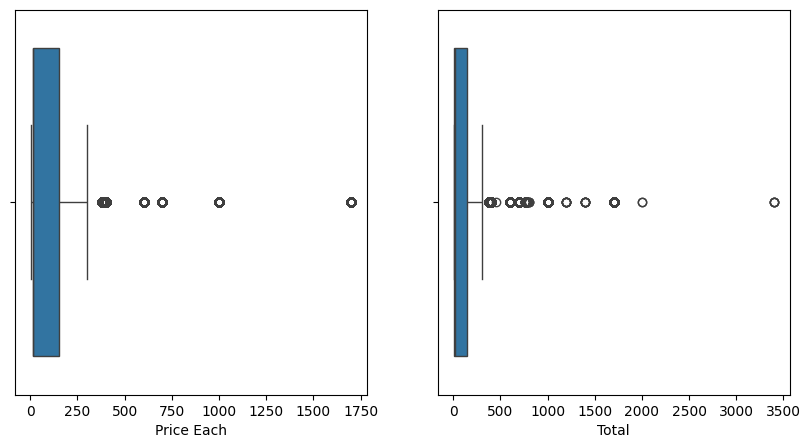

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(
    data = df,
    x = "Price Each"
)

plt.subplot(1,2,2)
sns.boxplot(
    data = df,
    x = "Total"
)
plt.show()


- Efectivamente, observamos la presencia de outliers, no los considero valores extremos ni tampoco erroneos, solamente hay demasiadas ventas y productos de un precio bajo y pocas de productos muy altos, los cuales crean el sesgo. Solamente tendremos en cuenta los valores atípicos para los gráficos y analisis.

### Analisis univariado (Categoricos)

- Usaremos gráficos como histogramas para todas las variables de nuestro dataset
- Variables a utilizar: Product, Month, City, State, Season

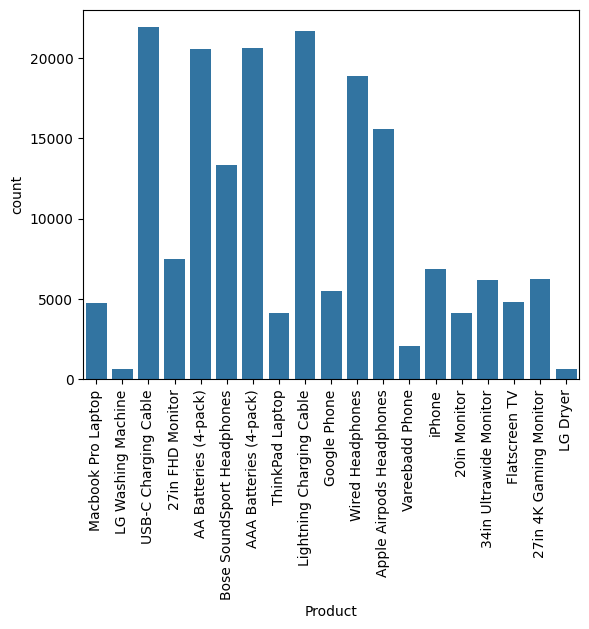

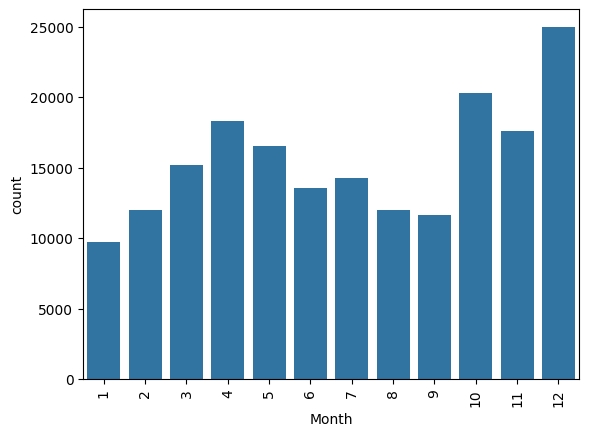

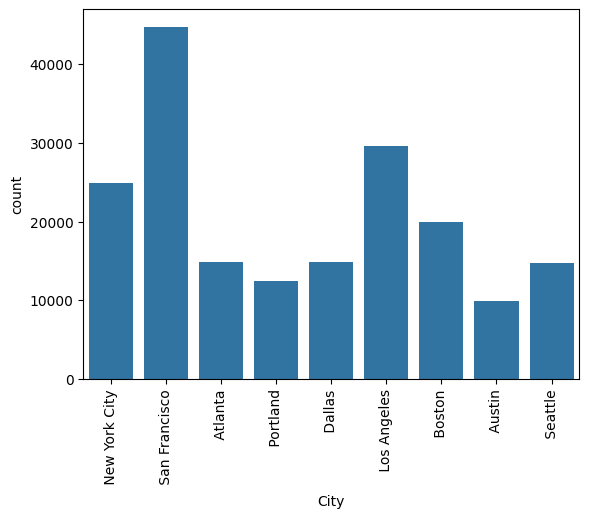

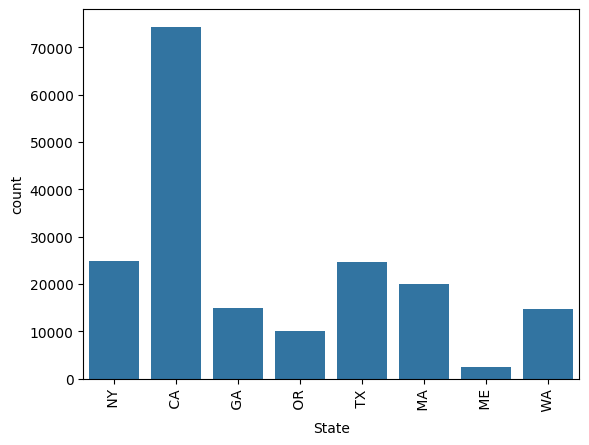

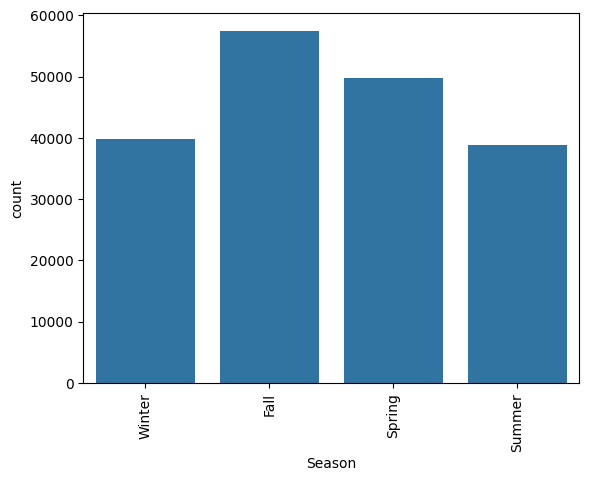

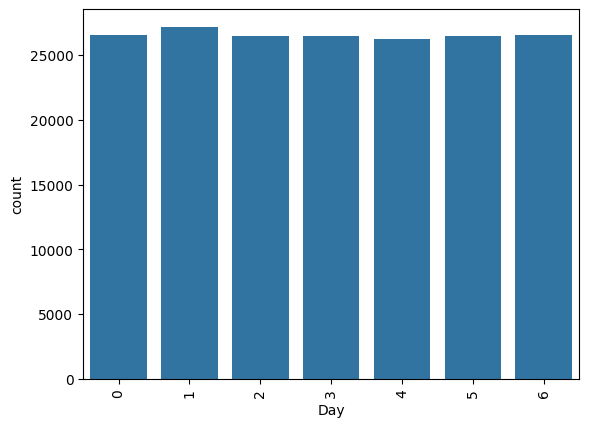

In [46]:
lista_categoricos = ["Product", "Month", "City", "State", "Season", "Day"] 

for column in lista_categoricos:
    
    sns.countplot(
    data= df,
    x = column
    )
    plt.xticks(rotation=90)
    plt.show()

#### Product:
    - Vemos una gran variedad de productos. Los productos con más ventas son usb c charging cable, charging lightning cable, AA Batteries (4-pack) y AAA Batteries (4-pack). Son productos de alta rotación y se necesitan en cualquier momento. Los clientes no pensarán ni sentiran que hastan gastando ya que son productos normalmente baratos e indispensables.
    - Debemos de hacer un analisis más detallado de los productos para saber si realmente los más vendidos son los que generan más rentabilidad  
#### Month
    - El mes con más ventas corresponde a diciembre, se ve un poco de estacionalidad en ciertos meses clave, como por ejemplo,en diciembre navidad, en noviembre black friday, en abril vacaciones de primavera, etc. Pero no podemos estar seguros de la estacionalidad ya que el dataset no es muy amplio
#### City
    - Las 3 ciudades principales cuentan con la mayor cantidad de ventas, New York, San francisco y Los Ángeles. Esto debido principalmente a su poblacion, cantidad de turismo y mayor presencia en el mercado, siendo de las principales ciudades turisticas del país
#### State
    - Vemos que hay un pico enorme de ventas en california, corresponde a la mayor cantidad de ventas, era de esperarse debido a que california es el estado más poblado de los estados unidos. En el gráfico le sigue new york y texas, cuyos estados también son de los más poblados de estados unidos
#### Season
    - La temporada con más ventas sería otoño, esto debido a la entrada y preparación de los meses festivos. Esto reespalda lo dicho anteriormente con respecto a los meses, ya que en invierno, finalizando las fechas festivas, hay un decremento importante en las ventas
#### Day
    - Se ve un gráfico bastante plano, prácticamente en todos los días de la semana hay casi la misma cantidad de ventas, esto podría deberse a que las personas podrían querer o necesitar cualquier producto en cualquier momento, no es como un bar, que normalmente los fines de semana tienen altas ventas, es una tienda de tecnologia.

### Analisis univariado (Numéricos):
- Usaremos Histogramas y gráficos de violin para evitar ver los outliers de una manera invasiva, como lo hace boxplot.
- Variables a utilizar: Price Each, Total, Quantity Ordered, Hour

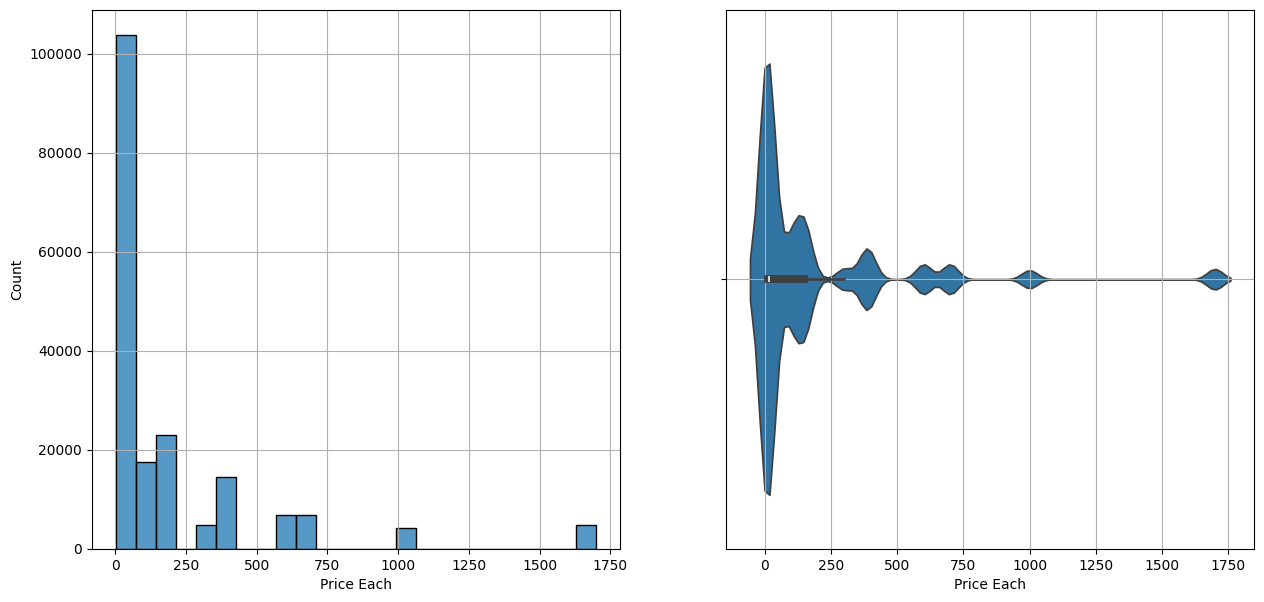

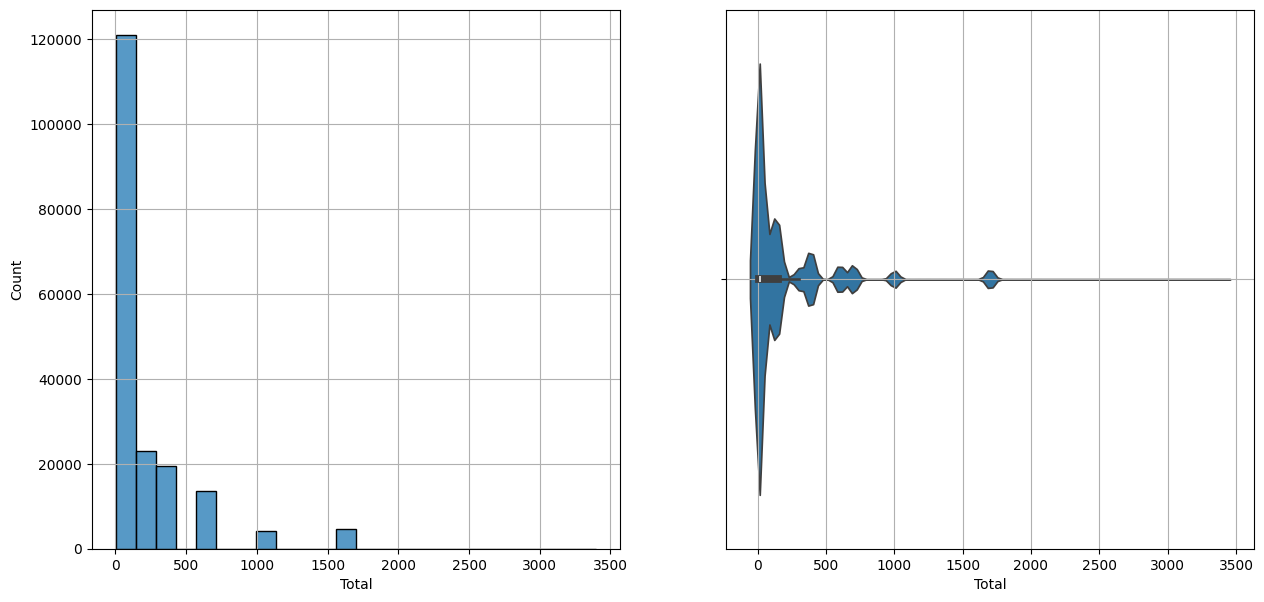

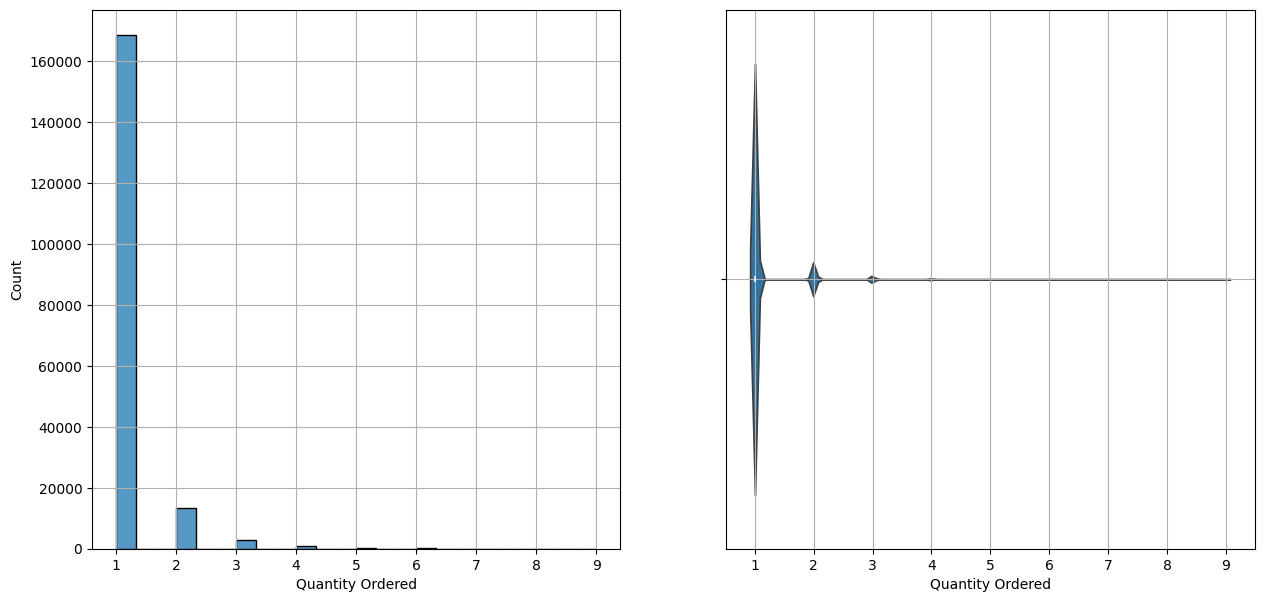

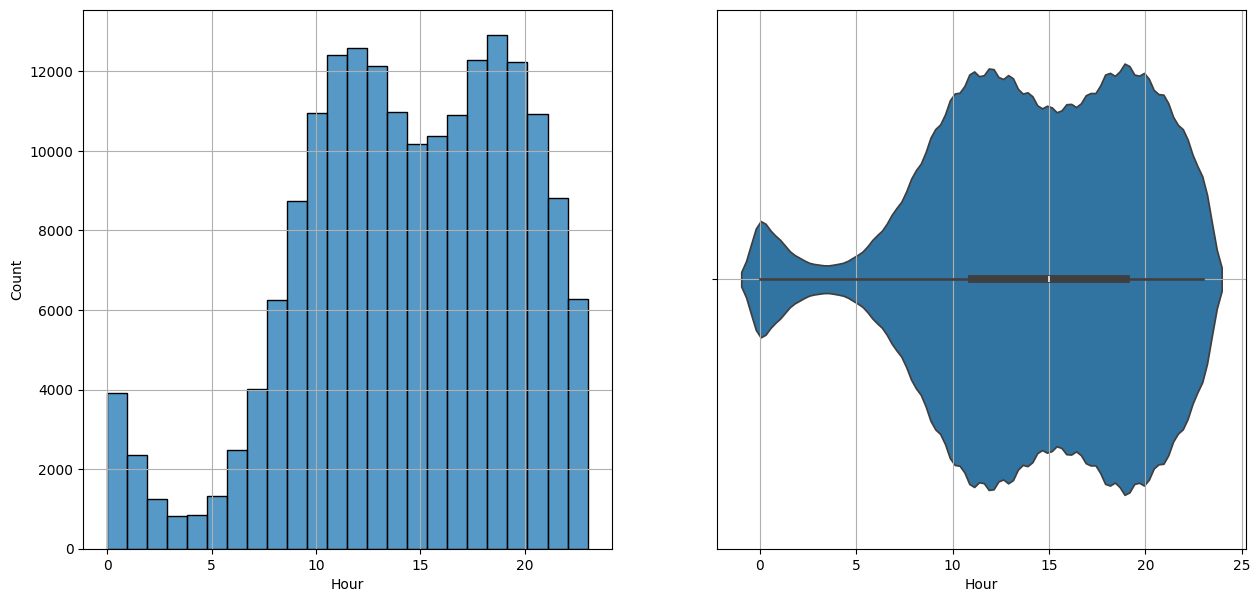

In [47]:
lista_numericos = ["Price Each", "Total", "Quantity Ordered", "Hour"]

for column in lista_numericos:
    plt.figure(figsize=(15, 7))
    plt.subplot(1,2,1)
    sns.histplot(
        data= df,
        x = column,
        #kde= True,
        bins = 24
        
    )
    plt.grid()
    
    plt.subplot(1,2,2)  #uso de violinplot para ver la distribución sin resaltar outliers 
    sns.violinplot(
        data= df,
        x = column,
        
    )
    plt.grid()
    plt.show()

#### Price Each:
    - El rango de los precios es de 1697 dolares
    - En esa columna, observamos un sesgo gigantesco, debido a los distintos precios, mayor cantidad de productos baratos, pero los productos caros crean este sesgo. Esto es porque hay productos como pilas, que rondan de 2 a 3 dolares, hasta computadoras, que pueden rondar los 1000 dolares. 
    - Se observa un pico gigantesco en los productos baratos, la alta rotacion y precios de dichos productos ocasionan eso.
    - Se observan outliers en los precios unitarios, debido a los productos más caros como computadoras o telefonos de alta gama, no los considero incorrectos porque son los precios que le corresponden a cada producto, si cambiaramos los precios estariamos metiendo datos incorrectos al dataset, solo habrá que tener en cuenta el sesgo para el analisis. Reitero, no son errores ni datos extremos, solamente son menos frecuentes
#### Total:
    - De manera muy similar a los precios unitarios, el 50% de los precios están en un rango aproximado de 1 a 180 dolares, esto debido a que los productos de más rotación y menor precio son los más adquiridos. Y como veremos en la siguiente variable, influye mucho la cantidad de productos comprados por orden de compra
    - En esta columna, observamos una distribución bastante similar a la anterior, un sesgo muy importante debido al rango de precios, aumenta un poco más el rango de dinero ya que se le suma otro factor, la cantidad de productos que se puede ordenar. Se sigue observando un gran pico en los totales más baratos y una larga cola a la derecha, sesgo positivo, por los totales más caros
    - Tambien se observan outliers, en esta columna han aumentado, de igual manera siguen siendo pocos y no los considero incorrectos ya que corresponden a los productos más costosos. Reitero, no son errores ni datos extremos, solamente son menos frecuentes
#### Quantity Ordered
    - En esta columna el sesgo es abismal, diría que el 90% de las compras son de una unidad, un 5% de 2 unidades y el resto se distribuye en el resto de cantidades. Las demás cantidades aparecen como outliers pero en realidad no lo son. No son errores ni datos extremos, solamente son menos frecuentes. Esto tambien nos da a entender que se trata de un negocio minorista, no hay compras con altas cantidades de productos
#### Hour
    - En ambos gráficos se observan dos picos o grupos que destacan. Se ven gran cantidad de compras de 10 a 15 y de 15 a 20hs, lo que podría coincidir con horarios de almuerzo y horarios de salida del trabajo. Hay un pequeño pico al rededor de las 00hs, indica compras nocturnas. Debido al horarío de compras, podría tratarse de un e-commerce o de una tienda 24hs. Debido al horario, determino que sería una tienda fisica con e-commerce, casi no existen tiendas de articulos electronicos o informáticos que sean 24hs. Esto nos ayuda a entender el gráfico de compras por día que vimos anteriormente, un e-commerce facilita e incentiva la compra en cualquier día de la semana, por eso el gráfico de días se veía plano, con misma cantidad de ventas independientemente del día. En este caso, podría considerarse reforzar los servidores o personal en estos horarios picos. Podrían realizarse promociones en horas de baja demanda para incentivar la compra. 


### Analisis Multivariado


In [48]:
# Vemos la cantidad de ventas por año
df["Order Date"].dt.year.value_counts()

Order Date
2019    185916
2020        34
Name: count, dtype: int64

-Ya que solamente 34 ventas pertenecen al 2020, solo graficaremos los datos historicos de 2019. Con esto tambien descartamos un analisis de tendencias o patrones a lo largo de los años, ya que no sería fiable ni representativas las tendecias con datos de solo un año

In [49]:

df_filtrado = df.query("`Order Date`.dt.year == 2019") #Filtramos el dataframe para que solo contenga datos del año 2019

df_filtrado.head()

,Customer_id,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,State,Season,Day
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,NY,Winter,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,NY,Winter,6
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,NY,Fall,3
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,CA,Winter,6
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,GA,Fall,2


### Gráficos de productos, unidades vendidas vs ingresos generados

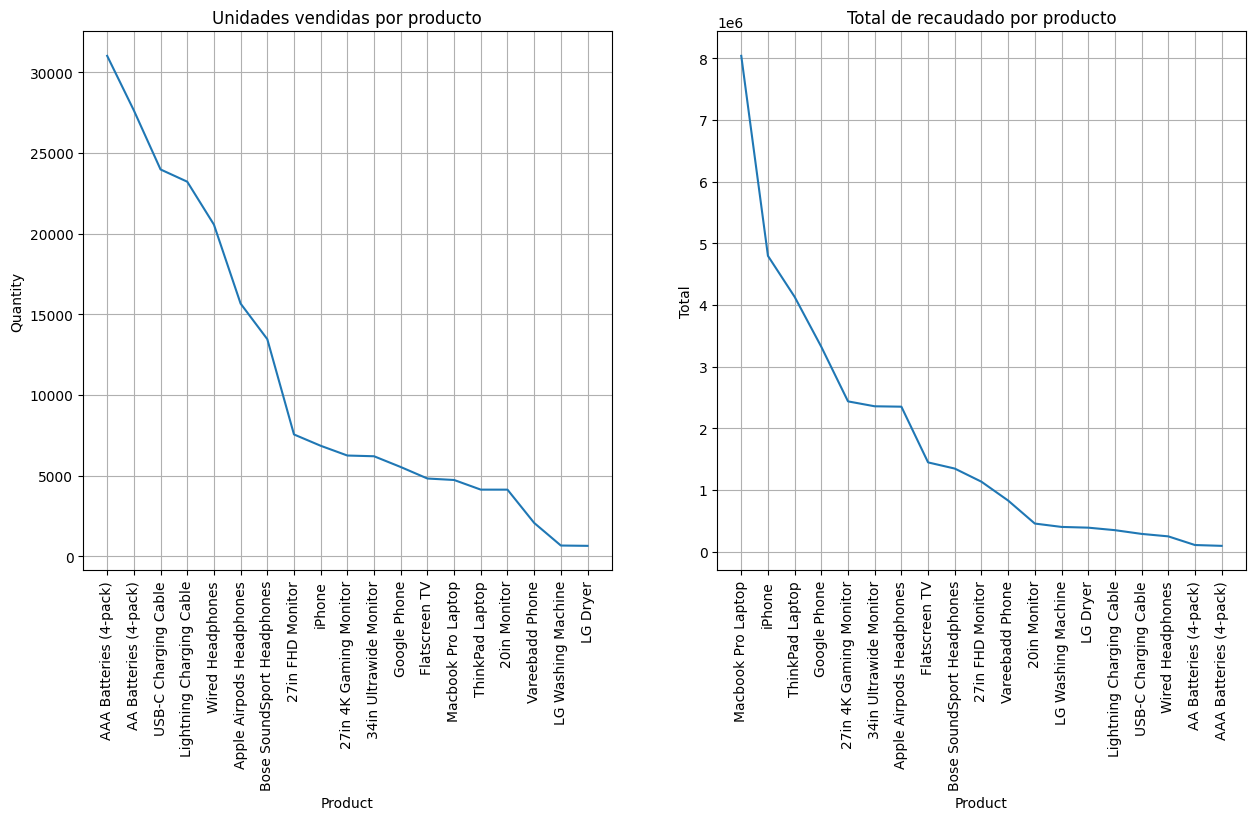

In [50]:
# Agrupamos por producto y sumamos la cantidad de ventas
df_products_sorted_quantity = df.groupby(["Product"])["Quantity Ordered"].sum().reset_index(name="Quantity").sort_values(by="Quantity", ascending=False) 

# Agrupamos por producto y sumamos la cantidad de ingresos
df_products_sorted_total = df.groupby(["Product"])["Total"].sum().reset_index().sort_values(by="Total", ascending=False) 

# display(df_products_sorted_quantity.head())
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.lineplot(
    data = df_products_sorted_quantity,
    x= "Product",
    y = "Quantity"
)
plt.xticks(rotation=90)
plt.grid()
plt.title("Unidades vendidas por producto")

plt.subplot(1,2,2)
sns.lineplot(
    data = df_products_sorted_total,
    x= "Product",
    y = "Total"
)
plt.title("Total de recaudado por producto")
plt.xticks(rotation=90)
plt.grid()
plt.show()


##### Unidades vendidas por producto:
- Podemos observar de una manera más realista la cantidad de ventas de productos. En el analisis univariado fue solamente un vistazo general, mostraba la cantidad de veces que un producto aparecia registrado en una compra, pero no especificaba la cantidad de ese producto. 
- De igual manera, podemos observar que los más vendidos siguen siendo AAA Batteries (4-pack), AA Batteries (4-pack) y USB-C Charging Cable, debido a que son los productos más baratos y de necesidad común, con una altisima rotación en el mercado.
- `Esto no significa que son los que más dinero generan, pero definitivamente sí generan mucho tráfico en las compras, cosa que es muy buena. Deberiamos de considerar ver qué productos se suelen vender juntos, de esta manera podemos realizar estrategias para aumentar las ventas, realizar combos, promociones, etc.`
##### Total recaudado por producto:
- Vemos que aquí se invierten los papeles. Los productos menos vendidos son los que recaudan más dinero, mientras que los más vendidos son los que recaudan menos dinero. En este caso, lo ideal sería eliminar, reemplazar o considerar la rentabilidad de los productos con pocas ventas y poca recaudación. Por ejemplo, LG Dryer es un producto con muy pocas ventas y poca recaudación y debería considerarse si realmente sigue siendo rentable, caso contrario, proceder a su reemplazo o eliminación. AAA Batteries (4-pack) y USB-C Charging Cable tienen poca recaudación, pero una cantidad de ventas abismal porque son productos con altisima rotación y de necesidad común, que generan mucho tráfico en el local, y esto es muy positivo. Si estos productos se eliminaran, la gran parte del flujo de clientes disminuiría drásticamente, esto sería muy negativo, ya que disminuirían potenciales compradores de otros productos

### Gráfico de productos con más ingresos por estado

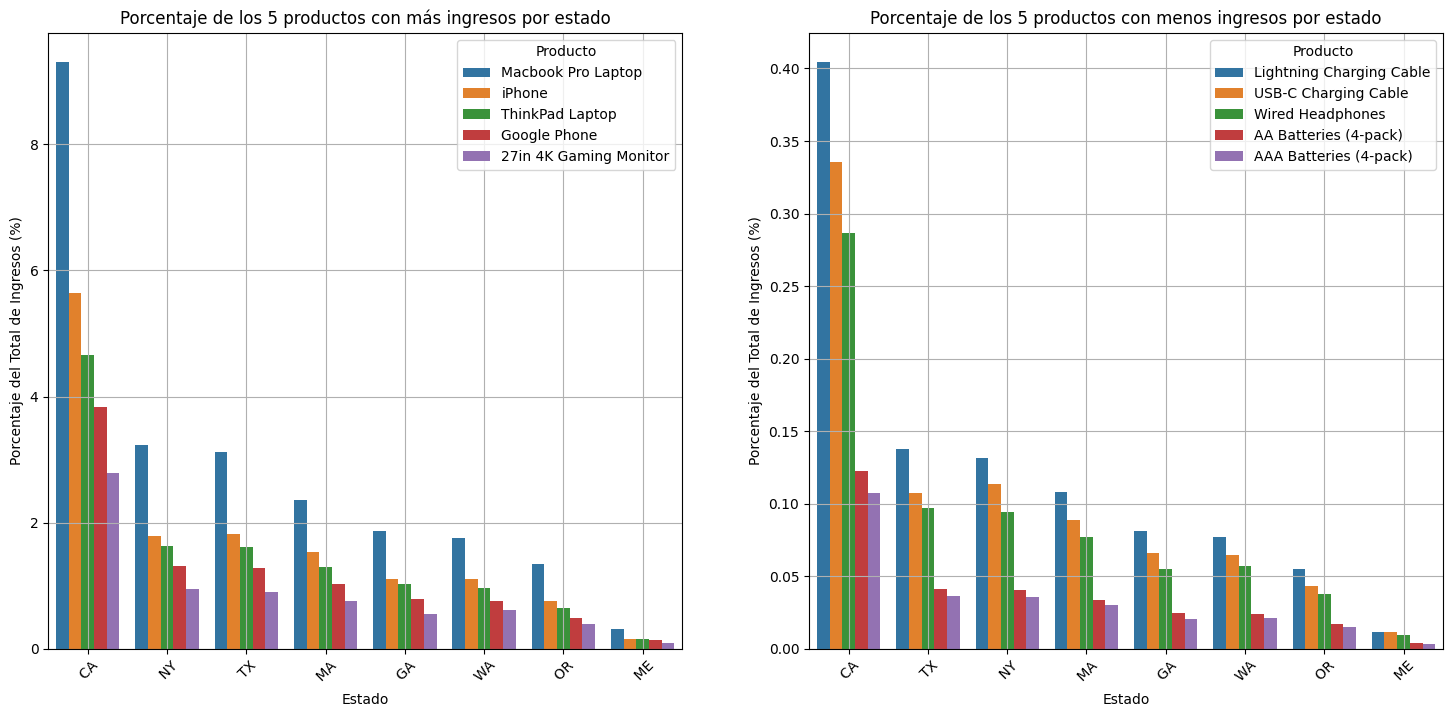

In [51]:

# Agrupamos por Estado y Producto, sumando los ingresos
products_state = df.groupby(["State", "Product"])["Total"].sum().reset_index()

# Ordenamos de mayor a menor segun los ingresos totales
products_state = products_state.sort_values(by="Total", ascending=False)

# Seleccionamos los 5 productos más vendidos
top_products = products_state["Product"].unique()[:5]

bottom_products = products_state["Product"].unique()[-5:]


# Filtramos los productos más vendidos 
filtered_df_top = products_state[products_state["Product"].isin(top_products)].copy()

# Calcular el porcentaje de cada estado-producto respecto al total general
filtered_df_top["Percentage"] = (filtered_df_top["Total"] / products_state["Total"].sum()) * 100


# Filtramos los productos menos vendidos
filtered_df_bottom = products_state[products_state["Product"].isin(bottom_products)].copy()

# Calcular el porcentaje de cada estado-producto respecto al total general
filtered_df_bottom["Percentage"] = (filtered_df_bottom["Total"] / products_state["Total"].sum()) * 100

# Creamos la figura
plt.figure(figsize=(18, 8))

# Grafico de los productos con más ingresos
plt.subplot(1,2,1)
sns.barplot(
    data=filtered_df_top, 
    x="State", 
    y="Percentage", 
    hue="Product", 
)

plt.xlabel("Estado")
plt.ylabel("Porcentaje del Total de Ingresos (%)")
plt.title("Porcentaje de los 5 productos con más ingresos por estado")
plt.legend(title="Producto", loc="upper right")
plt.xticks(rotation=45)
plt.grid()

# Grafico de los productos con menos ingresos
plt.subplot(1,2,2)
sns.barplot(
    data=filtered_df_bottom, 
    x="State", 
    y="Percentage", 
    hue="Product", 
)

plt.xlabel("Estado")
plt.ylabel("Porcentaje del Total de Ingresos (%)")
plt.title("Porcentaje de los 5 productos con menos ingresos por estado")
plt.legend(title="Producto", loc="upper right")
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### Productos con más ingresos
- Los productos más costosos, responsables de la mayor ganancia del negocio, tienen mayor concentracion de ventas en estados con alta poblacion, desarrollo economico y turismo, como California, New York, Texas y Florida. Esto indica que estos mercados tienen mayor disposición del pago y preferencia por estos productos más premium. Para maximizar los ingresos, sería bueno enfocarnos en estos estados con campañas de marketing dirigidas, promociones exclusivas o expansion de inventario en estas zonas

##### Productos con menos ingresos
- Los productos de menor costo, que generan el mayor volumen de ventas y atraen tráfico al negocio, tienen una alta concentracion en estados con alta poblacion, sin depender necesariamente de su desarrollo economico. Esto sugiere que estos productos atraen a muchos clientes, incentivando a compras adicionales de productos más rentables. Para optimizar esta relacion, se pueden diseñar estrategias de venta cruzada, promociones y/o combos que incentiven la compra de los productos más rentables. Por ejemplo, una organizacion en la tienda fisica o digital que haga que los clientes pasen por los productos más rentables antes que los más vendidos. 

### Gráfico de pareto de unidades vendidas por producto:

In [52]:
ventas_producto_cantidad = df.groupby(["Product"])["Quantity Ordered"].sum().reset_index(name="Quantity")  # creamos un nuevo dataframe agrupado por producto, muestra cantidad de unidades vendidas
ventas_producto_cantidad = ventas_producto_cantidad.sort_values("Quantity", ascending=False) # ordenamos de manera descendente 

ventas_producto_cantidad["Ventas_acumuladas"] = ventas_producto_cantidad["Quantity"].cumsum() # suma acumulada de cantidad de unidades vendias, ventas acumuladas

ventas_producto_cantidad["Porcentaje_ventas"] = ventas_producto_cantidad["Quantity"] / ventas_producto_cantidad["Quantity"].sum() # porcentaje de ventas 

ventas_producto_cantidad["Porcentaje_ventas_acumuladas"] = (ventas_producto_cantidad["Ventas_acumuladas"] / ventas_producto_cantidad["Quantity"].sum() ) * 100 # porcentaje de ventas acumuladas

ventas_producto_cantidad.head()  #vemos el dataframe

,Product,Quantity,Ventas_acumuladas,Porcentaje_ventas,Porcentaje_ventas_acumuladas
5,AAA Batteries (4-pack),31017,31017,0.148351,14.835062
4,AA Batteries (4-pack),27635,58652,0.132175,28.052554
15,USB-C Charging Cable,23975,82627,0.114670,39.519512
12,Lightning Charging Cable,23217,105844,0.111044,50.623927
17,Wired Headphones,20557,126401,0.098322,60.456096


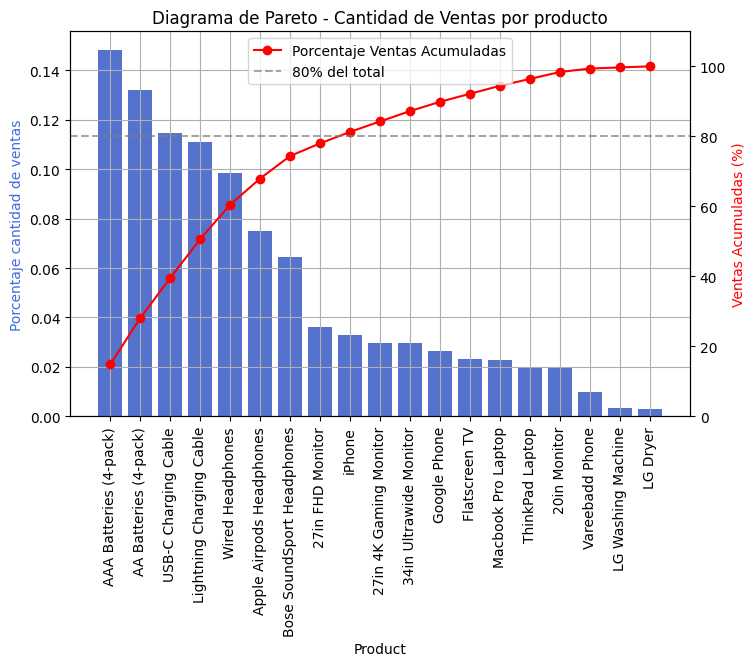

In [53]:
fig, ax1 = plt.subplots(figsize=(8,5)) # se crea una figura y el eje principal

sns.barplot(
    data= ventas_producto_cantidad,
    x = "Product",    
    y = "Porcentaje_ventas",
    color="royalblue",
    ax = ax1        # el gráfico de barras corresponde al eje principal ax1
)
plt.xticks(rotation=90)
plt.grid()

ax2 = ax1.twinx()   # esto crea un segundo eje y llamado ax2 en el mismo gráfico, permite superponer dos gráficos 
                    # ax1 es para el gráfico de barras y ax2 es para el gráfico de linea
ax2.plot(
    ventas_producto_cantidad["Product"],  # eje x 
    ventas_producto_cantidad["Porcentaje_ventas_acumuladas"], # eje y 
    color = "red",     # color de la linea
    marker= "o",        # cada punto se marca con un circulo
    linestyle = "-",    # linea continua 
    label = "Porcentaje Ventas Acumuladas"
)

# Etiquetas que corresponden a cada eje 
ax1.set_ylabel("Porcentaje cantidad de ventas", color="royalblue")
ax2.set_ylabel("Ventas Acumuladas (%)", color="red")
ax1.set_xlabel("Product")
ax2.set_ylim(0, 110)    #ajusta el rango del eje y derecho, de 0 a 110 para que se vea mejor el ultimo valor del eje y 
ax1.set_title("Diagrama de Pareto - Cantidad de Ventas por producto")
ax2.axhline(80, color="gray", linestyle="dashed", alpha=0.7, label="80% del total") # acá agregamos la linea que marca el 80% de acumulación 
ax2.legend(loc="upper center") #ubicacion de la leyenda 

plt.show()

- Nueve productos representan el 80% del total de unidades vendidas. Es clave mantener un alto stock de estos, ya que, aunque no sean los más rentables, atraen clientes a los locales o el e-comerce y pueden impulsar compras adicionales

### Gráfico de pareto de total de ingresos por producto:

In [54]:
ventas_producto_total = df.groupby(["Product"])["Total"].sum().reset_index()   # creamos un nuevo dataframe agrupado por estado, muestra cantidad de ventas
ventas_producto_total = ventas_producto_total.sort_values("Total", ascending=False) # ordenamos de manera descendente 

ventas_producto_total["Ingresos_acumulados"] = ventas_producto_total["Total"].cumsum() # suma acumulada de cantidad de ventas, ventas acumuladas

ventas_producto_total["Porcentaje_ingresos"] = ventas_producto_total["Total"] / ventas_producto_total["Total"].sum() # porcentaje de ventas 

ventas_producto_total["Porcentaje_ingresos_acumulados"] = (ventas_producto_total["Ingresos_acumulados"] / ventas_producto_total["Total"].sum() ) * 100 # porcentaje de ventas acumuladas

ventas_producto_total.head()  #vemos el dataframe

,Product,Total,Ingresos_acumulados,Porcentaje_ingresos,Porcentaje_ingresos_acumulados
13,Macbook Pro Laptop,8037600.00,8037600.00,0.233028,23.302771
18,iPhone,4794300.00,12831900.00,0.138997,37.202501
14,ThinkPad Laptop,4129958.70,16961858.70,0.119737,49.176160
9,Google Phone,3319200.00,20281058.70,0.096231,58.799251
1,27in 4K Gaming Monitor,2435097.56,22716156.26,0.070599,65.859134


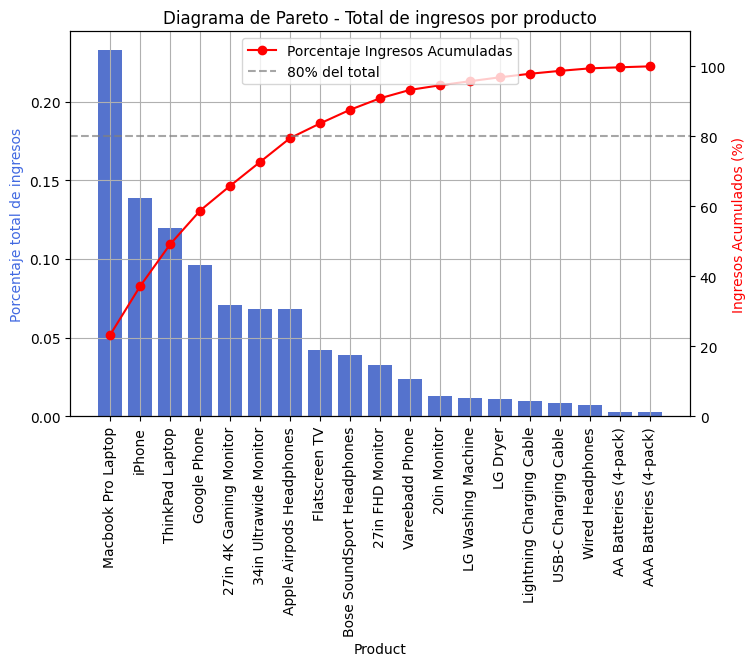

In [55]:
fig, ax1 = plt.subplots(figsize=(8,5)) # se crea una figura y el eje principal

sns.barplot(
    data= ventas_producto_total,
    x = "Product",
    y = "Porcentaje_ingresos",
    color="royalblue",
    ax = ax1        # el gráfico de barras corresponde al eje principal ax1
)
plt.xticks(rotation=90)
plt.grid()

ax2 = ax1.twinx()   # esto crea un segundo eje y llamado ax2 en el mismo gráfico, permite superponer dos gráficos 
                    # ax1 es para el gráfico de barras y ax2 es para el gráfico de linea
ax2.plot(
    ventas_producto_total["Product"],  # eje x 
    ventas_producto_total["Porcentaje_ingresos_acumulados"], # eje y 
    color = "red",     # color de la linea
    marker= "o",        # cada punto se marca con un circulo
    linestyle = "-",    # linea continua 
    label = "Porcentaje Ingresos Acumuladas"
)

# Etiquetas que corresponden a cada eje 
ax1.set_ylabel("Porcentaje total de ingresos", color="royalblue")
ax2.set_ylabel("Ingresos Acumulados (%)", color="red")
ax1.set_xlabel("Product")
ax2.set_ylim(0, 110)    #ajusta el rango del eje y derecho, de 0 a 110 para que se vea mejor el ultimo valor del eje y 
ax1.set_title("Diagrama de Pareto - Total de ingresos por producto")
ax2.axhline(80, color="gray", linestyle="dashed", alpha=0.7, label="80% del total") # acá agregamos la linea que marca el 80% de acumulación 
ax2.legend(loc="upper center") #ubicacion de la leyenda 

plt.show()

- Siete productos generan el 80% de los ingresos. Para maximizar su impacto en la rentabilidad del negocio, es clave invertir en estrategias como publicidad, promociones y descuentos dirigidos a un público adecuado, ya que estos productos tienen un precio más alto y requieren un enfoque preciso para impulsar las ventas. Esto no supone un esfuerzo mayor, ya que con menos de la mitad de productos, ya generamos el 80% de las ganancias.

### Productos que se compran juntos:
- A continuacion, haremos un Market Basket Analysis, consiste en implementar un algortimo, en este caso, Apriori, para encontrar patrones de compras en los productos

- Primeramente, haremos una breve verificacion de uno de los puntos claves para este analisis, el customer_id y Order ID, los cuales nos ayudan a identificar a quienes pertenecen la compra

In [56]:
df["Customer_id"].value_counts().head()


Customer_id
9722    12
9721    12
9720    12
9719    12
9718    12
Name: count, dtype: int64

In [57]:
df["Order ID"].value_counts().head()


Order ID
160873    5
196615    4
178158    4
304802    4
242936    4
Name: count, dtype: int64

- Vemos que hay varios clientes que repiten las compras, asi tambien hay varias ordenes, esto es porque solo muestra un producto por registro en una orden. 

In [58]:
df.query("`Order ID` == 160873")


,Customer_id,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,State,Season,Day
54069,10836,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,700.00,San Francisco,10,CA,Winter,6
54070,10837,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,14.95,San Francisco,10,CA,Winter,6
54071,10838,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,150.00,San Francisco,10,CA,Winter,6
54072,10839,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,11.99,San Francisco,10,CA,Winter,6
54073,10840,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,600.00,San Francisco,10,CA,Winter,6


- En esta tabla vemos claras inconsistencias, no es posible que una misma orden pertenezca a más de un cliente.

In [59]:
df.query("`Customer_id` == 9722").head()


,Customer_id,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,State,Season,Day
9673,9722,304930,USB-C Charging Cable,1,11.95,2019-12-07 15:42:00,"595 7th St, Boston, MA 02215",12,11.95,Boston,15,MA,Fall,5
34662,9722,185838,USB-C Charging Cable,1,11.95,2019-04-08 17:42:00,"675 Main St, Atlanta, GA 30301",4,11.95,Atlanta,17,GA,Spring,0
52956,9722,159788,USB-C Charging Cable,1,11.95,2019-02-10 21:13:00,"673 12th St, Austin, TX 73301",2,11.95,Austin,21,TX,Winter,6
64941,9722,171296,Macbook Pro Laptop,1,1700.00,2019-03-04 14:49:00,"751 6th St, Portland, OR 97035",3,1700.00,Portland,14,OR,Winter,0
80095,9722,245971,Google Phone,1,600.00,2019-08-16 18:50:00,"29 Washington St, San Francisco, CA 94016",8,600.00,San Francisco,18,CA,Summer,4


- Aquí volvemos a ver inconsistencias, en este caso, un cliente sí puede tener distintas ordenes y en distintas fechas, lo extraño es que se asocia con distintas direcciones, unas muy alejadas de la otra. Tengo dos posibles conclusiones, la primera es que cabe la posibilidad de que se esten compartiendo cuentas a la hora de comprar en el e-comerce. La segunda es que probablemente hay duplicados en la columna de customer_id. Entonces, para el analisis de patrones de compras por productos, solamente usaremos el Order ID para evitar incosistencias.

In [ ]:
# Importamos las librerias necesarias
from mlxtend.frequent_patterns import apriori, association_rules

# agrupamos los datos por orden y producto, contamos la cantidad de productos y rellenamos los valores nulos con 0
basket = df.groupby(["Order ID", "Product"])["Product"].count().unstack().reset_index().fillna(0)

# eliminamos la columna Order ID, ya no será necesaria 
basket = basket.drop("Order ID", axis=1)

# convertimos los valores a booleanos, el modelo apriori es mas eficiente con valores booleanos porque no tiene que hacer conversiones
basket = basket.astype(bool)

# aplicamos el algoritmo apriori, con un soporte mínimo de 0.005 y usamos los nombres de las columnas para mayor claridad
frenquent_itemsets = apriori(basket, min_support=0.005, use_colnames=True) # min_suport es la frecuencia mínima que debe tener un conjunto de productos sea considerado frecuente

# aplicamos el algoritmo 
rules = association_rules(frenquent_itemsets, metric="lift", min_threshold=1.0)
print(rules)


                  antecedents                 consequents  antecedent support  \
0      (USB-C Charging Cable)              (Google Phone)            0.122480   
1              (Google Phone)      (USB-C Charging Cable)            0.030946   
2  (Lightning Charging Cable)                    (iPhone)            0.121074   
3                    (iPhone)  (Lightning Charging Cable)            0.038333   

   consequent support   support  confidence      lift  representativity  \
0            0.030946  0.005587    0.045619  1.474120               1.0   
1            0.122480  0.005587    0.180551  1.474120               1.0   
2            0.038333  0.005666    0.046797  1.220804               1.0   
3            0.121074  0.005666    0.147807  1.220804               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.001797    1.015374       0.366521  0.037794   0.015141    0.113085  
1  0.001797    1.070865       0.331900  0.037794   0.066176    0.11308

## Productos que se venden juntos:
#### Métricas:
Antecedente = Producto que se compró primero
Consuecuente = Producto que se compró despues
Support = % de ordenes donde aparecen ambos productos juntos
Antecedent support = % de ordenes donde aparece el antecedente 
Consecuent support = % de ordenes en donde aparece el consecuente
Confidence = Probabilidad de que el cliente compre el consecuente si ya compró el antecedente
lift = relacion de cómo influye la compra del antecedente en la del consecuente
leverage = diferencia entre la frecuencia real y la esperada por azar
conviction = Medida de certeza de que una regla no ocurre por azar

#### Métricas clave:
- `Confidence`
- `Lift`
- `Support`
#### Productos:
- 

### Graficos de productos más vendidos y con más rentabilidad a lo largo del tiempo:
- Daremos un vistazo general de cómo se desempeñaron los productos más vendidos y los más rentables a lo largo del año

In [61]:
# # Agrupamos por Estado y Producto, sumando los ingresos
# products_money = df.groupby(["Product", "Month"])["Total"].sum().reset_index()

# products_quantity = df.groupby(["Product", "Month"])["Quantity Ordered"].sum().reset_index(name="Quantity")

# # Ordenamos de mayor a menor segun los ingresos totales
# products_money = products_money.sort_values(by="Total", ascending=False)

# # Ordenamos de mayor a menor segun las cantidades totales
# products_quantity = products_quantity.sort_values(by="Quantity", ascending=False)

# # Seleccionamos los 5 productos con más recaudación
# top_products_money = products_money["Product"].unique()[:5]

# # Seleccionamos los 5 productos más unidades vendidas
# top_products_quantity = products_quantity["Product"].unique()[:5]

# # Filtramos los productos con más recaudación  
# filtered_df_top_money= products_money[products_money["Product"].isin(top_products_money)].copy()

# # Filtramos los productos con más unidades vendidas
# filtered_df_top_quantity= products_quantity[products_quantity["Product"].isin(top_products_quantity)].copy()

# filtered_df_top_money["Percentage"] = (filtered_df_top_money["Total"] / products_money["Total"].sum()) * 100


# plt.figure(figsize=(15, 7))
# plt.subplot(1,2,1)
# sns.lineplot(
#     data = filtered_df_top_quantity,
#     x = "Month",
#     y = "Quantity",
#     hue = "Product",
# )
# plt.grid()

# plt.subplot(1,2,2)
# sns.lineplot(
#     data = filtered_df_top_money,
#     x = "Month",
#     y = "Percentage",
#     hue = "Product",
# )
# plt.grid()
# plt.show()

- Podemos observar el mismo patrón en ambas categorias, vemos que las ventas aumentan en abril, debido a las rebajas de otoño,el resto de meses disminuyen las ventas, 

## Predicciones:
- Una vez visto los gráficos anteriores, vimos gran estacionalidad en los datos. Con esto, llegué a la idea de implemetar un modelo predictivo para ver la cantidad de futuras ventas en cierto periodo de tiempo, usaré el modelo "Prophet", ya que este tolera outliers, podemos agregarle fechas especiales como podría ser navidad, y también detecta patrones estacionales automáticamente.


In [62]:
# #importamos la libreria prophet
# from prophet import Prophet

# # agrupamos el df por fecha y le agregamos el total de ventas
# df_grouped_real = df.groupby(df["Order Date"].dt.to_period("M")).size().reset_index(name="Sales") #acá se creó una serie temporal de ventas mensuales

# df_grouped_real["Order Date"] = df_grouped_real["Order Date"].dt.to_timestamp() # convierte el periodo a datetime

# # renombramos las columnas para el modelo
# df_grouped_real = df_grouped_real.rename(columns = {"Order Date" : "ds", "Sales" : "y"})

# df_grouped_real.head() # vemos el dataframe


In [63]:
# """Antes de crear el modelo, crearemos un datarame con fechas especiales para que el modelo las tenga en cuenta, las fechas que agregaremos son, navidad y black friday,
# ya que son el mayor pico de ventas de todo el año, y el modelo debe tenerlas en cuenta para hacer predicciones más precisas.
# """
# # creamos un dataframe con las fechas especiales
# df_fechas_especiales = pd.DataFrame({
#     "holiday": ["Navidad", "Black Friday"],
#     "ds" : pd.to_datetime(["2019-12-01", "2019-11-29"]), # la fecha de navidad es el 1 de diciembre ya que las ventas de navidad empiezan a subir desde el primer día de diciembre y el black friday es el 29 de noviembre
#     "lower_window":[0, 0,],  # define cuantos dias antes de la fecha especial inicia el impacto de ventas, en este caso es el mismo día
#     "upper_window":[31, 0]   # define cuantos dias despues de la fecha especial termina el impacto de ventas, en este caso es 24 días despues de navidad y el mismo dia para black friday
# })

# df_fechas_especiales.head() # vemos el dataframe

In [64]:

# # creamos el modelo prophet
# model = Prophet(holidays=df_fechas_especiales, weekly_seasonality=True, daily_seasonality=True) # usamos estacionalidades diarias y semanales, no usamos anuales porque solo tenemos datos de 1 año completo
# # weeklky_seasonality captura la estacionalidad semanal
# # daily_seasonality captura la estacionalidad diaria

# model.add_seasonality(name="monthly", period= 30.5, fourier_order=1) # agregamos una estacionalidad mensual
# # estacionalidad mensual, le asignamos un periodo de 30.5 días, que es el promedio de días en un mes, y un fourier_order de 2, fue el valor que mejor se adecuó al modelo. Fourier_order controla qué tan detalladamente el modelo aprende los patrones repetitivos
# # Con numero alto de fourier_order el modelo puede aprender ruido, y con un número bajo puede ser muy basico y perder detalles importantes 

# # ajustamos el modelo a los datos
# model.fit(df_grouped_real)



In [65]:
# # creaos un dataframe con las fechas futuras
# futuro = model.make_future_dataframe(periods=12, freq="ME")  # Esto crea un dataframe con las fechas futuras, en este caso 6 meses

# #hacemos la prediccion
# prediccion = model.predict(futuro)

# # imprimimos la prediccíon para los proximos 12 meses
# print(prediccion[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12)) # yhat es la predicción(venta esperada), yhat_lower es el límite inferior(venta minima esperada) y yhat_upper es el límite superior (venta maxima esperada)

# # # guardamos la predicción en otro dataframe
# df_prediccion_csv = prediccion[["ds", "yhat"]]

# df_prediccion_csv = df_prediccion_csv.merge(df_grouped_real, on="ds", how="left") # unimos el dataframe de predicción con las ventas reales

# #redondeamos los valores de la predicción
# df_prediccion_csv["yhat"] = np.round(df_prediccion_csv["yhat"], 0)
# df_prediccion_csv["y"] = np.round(df_prediccion_csv["y"], 0)

# # renombramos las columnas
# df_prediccion_csv.rename(columns = {"yhat" : "Prediccion", "y" : "Ventas Reales", "ds": "Fecha"}, inplace=True)

# # guardamos la predicción en un archivo csv
# df_prediccion_csv.to_csv("data/prediccion_ventas.csv", index=False)
# # ***considerar si me conviete la prediccion en un archivo y las ventas reales en otro archivo***

In [66]:
# # graficamos las predicciones
# plt.figure(figsize=(10, 6))

# #datos reales (ventas)
# sns.lineplot(
#     x=df_grouped_real['ds'],
#     y=df_grouped_real['y'],
#     label='Ventas Reales',
#     color='blue'
# )

# #  predicciones del modelo prophet
# sns.lineplot(
#     x=prediccion['ds'], 
#     y=prediccion['yhat'],
#     label='Predicción Prophet',
#     color='red'
# )

# # titulos y etiquetas
# plt.title('Ventas Reales vs Predicción Prophet')
# plt.xlabel('Fecha')
# plt.ylabel('Ventas')
# plt.legend()

# # Mostrar el grafico
# plt.grid()
# plt.show()

### Evaluación del modelo predictivo
- Evaluaremos el modelo predictivo con MAE (Error Absoluto Medio), RMSE (Raiz del error cuadratico medio) y MAPE (Errir porcentual absoluto medio), estas tres métricas en conjunto nos ayudarán a tener un analisis más completo.

In [67]:
# df_evaluacion = df_grouped_real.merge(prediccion[["ds", "yhat"]], on="ds", how="left") # unimos los datos reales con las predicciones

# df_evaluacion = df_evaluacion.rename(columns={"y": "Real", "yhat": "Prediccion"}) # renombramos las columnas

# df_evaluacion.head(50) # vemos el dataframe



In [68]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# mae = mean_absolute_error(df_evaluacion["Real"], df_evaluacion["Prediccion"]) # calculamos el error absoluto medio

# rmse = np.sqrt(mean_squared_error(df_evaluacion["Real"], df_evaluacion["Prediccion"])) # calculamos el error cuadratico medio

# mape = np.mean(np.abs((df_evaluacion["Real"] - df_evaluacion["Prediccion"]) / df_evaluacion["Real"])) * 100 # calculamos el error porcentual absoluto medio

# print(f"Error absoluto medio (MAE): {mae:.2f}") # Promedio el cual el modelo se equivoca en las predicciones

# print(f"Error cuadratico medio (RMSE): {rmse:.2f}") # Promedio de la raiz cuadrada de los errores al cuadrado, similar al MAE pero penaliza más los errores grandes

# print(f"Error porcentual absoluto medio (MAPE): {mape:.2f}%") # Promedio de los errores porcentuales, nos dice que tan lejos está el modelo de las predicciones reales en porcentaje

## Conclusion del modelo predictivo: 
- Luego de varias pruebas y errores con el modelo predictivo, logré un modelo relativamente correcto. Como podemos observar, en el año 2019, que son los datos que tenemos registrados, el modelo predictivo siguió la tendencia de una manera bastante similar a la real, siguiendo las mismas subidas y caidas pero de una manera más drástica pero acertada, esto nos da la confianza para seguir el modelo. Las evaluaciones que realizamos al modelo predictivo nos arroja un mae realitvamente bajo, en promedio el modelo se quivoca en 909 ventas por mes. El RMSE penaliza más los errores grandes, es muy similar al MAE, en promedio se equivoca en 1359 ventas por mes. Por ultimo, el MAPE nos arroja un error del 6.81% del valor real de las ventas.

- Debemos tener en cuenta que no tenemos suficientes datos historicos, solamente del 2019, debido a eso, el modelo predictivo replicó la caida de ventas debido a la pandemia. Si tuvieramos datos de más años, no replicaría esa caida anormal.

- Con este modelo predictivo, y las medidas de error, podemos tener una visíon más amplia de las futuras ventas, y saber que esperar, teniendo en cuenta los posibles errores en las ventas ya mencionados, se podría hacer un cálculo restando estos errores y tendriamos una predicción  para reforzar recursos en durante el año

In [69]:
# hacer evaluación del modelo
# analisis de patrones de compras ¿Los clientes compran los mismos productos juntos? (Análisis de asociación, como reglas de Apriori).
# Segmentación de clientes: Clientes que compran con frecuencia vs. clientes esporádicos.

#Agrupación de productos: ¿Qué productos se venden juntos con frecuencia? (Análisis de asociación, como reglas de Apriori).


# investigar clustering



### Clustering, agrupación de clientes

- Calculamos la recencia de los clientes

In [70]:
# # encontrar la fecha más reciente en los datos
# fecha_mas_reciente = df["Order Date"].max()

# # Encontrar la ultima compra de cada cliente
# recencia = df.groupby("Customer_id")["Order Date"].max().reset_index(name="Ultima_compra")

# # calculamos la recencia de cada cliente, restando la fecha más reciente con la fecha de la última compra
# recencia["Recencia"] = (fecha_mas_reciente - recencia["Ultima_compra"]).dt.days # convertimos la diferencia de fechas a días 

# recencia = recencia.drop(columns=["Ultima_compra"]) # eliminamos la columna de la ultima compra, ya no la usaremos

# recencia.head() # vemos el dataframe

- Calculamos la frecuencia de los clientes

In [71]:
# # contamos la cantidad de compras de cada cliente
# frecuencia = df.groupby("Customer_id").size().reset_index(name="Frecuencia")

# frecuencia.head() # vemos el dataframe

- Calculamos el monto total gastado por cada cliente

In [72]:
# # calculamos el total gastado por cada cliente
# monetaria = df.groupby("Customer_id")["Total"].sum().reset_index(name="Monetaria")

# monetaria.head() #vemos el dataframe

- Unimos todo en un solo dataframe

In [73]:
# # unimos las tres tablas anteriores

# #rmf significa recencia, frecuencia y monetaria
# rmf = recencia.merge(frecuencia, on= "Customer_id", how="inner").merge(monetaria, on= "Customer_id", how="inner") #usamos inner join para que solo se queden los clientes que estén en las tres tablas

# rmf.head() # vemos el dataframe


- Normalizamos los datos, kmeans los valores grandes pueden afectar el resultado

In [74]:
# from sklearn.preprocessing import StandardScaler # importamos la libreria para escalar los datos

# # aplicamos la normalización a los datos
# scaler = StandardScaler()
# rmf_escalado = scaler.fit_transform(rmf.drop(columns="Customer_id")) # escalamos los datos, eliminamos la columna de Customer_id porque no la necesitamos

# rmf_escalado_df = pd.DataFrame(rmf_escalado, columns=["Recencia", "Frecuencia", "Monetaria"]) # el escalado devuelve un array, lo convertimos a un dataframe

# rmf_escalado_df.head() # vemos el dataframe con los datos en una misma escala


- Elegimos el numero de clusters, kmeans necesita que le digamos cuantos grupos queremos encontrar
- Usaremos el metodo del codo

In [75]:
# from sklearn.cluster import KMeans # importamos la libreria para hacer clustering

# wcss = [] # lista para guardar el wcss, es una metrica que mide la suma de las distancias cuadradas de cada punto al centroide de su cluster
# #mientras mas bajo es el wcss, mejor agrupados estan los datos
# #el metodo codo usa el wcss para elegir el numero optimo de clusters

# # probamos valores de k desde 1 hasta 11
# for k in range(1,11):
#     kmeans = KMeans(n_clusters=k, random_state=21) #irá iterando por cada valor de k, random_state fija la semilla aleatoria para garantizar tener los mismos resultados cada vez que se ejecute, puede ser cualquier numero
    
#     kmeans.fit(rmf_escalado) # ajustamos el modelo
    
#     wcss.append(kmeans.inertia_) # guardamos la inercia en la lista wcss, cuanto mas baja es la inercia, más cercanos estan los puntos de datos a su centroide
    
    
    
# # graficamos el metodo codo para decidir el numero de clusters
# plt.figure(figsize=(10,5))
# plt.plot(range(1,11), wcss, marker="o")
# plt.xlabel("Número de Clusters (K)")
# plt.ylabel("WCSS (Inercia)")
# plt.title("Método del Codo")
# plt.show()

- Analizando el gráfico, uno de los posibles codos serían el 2 y el 5, he elegido el 5 porque luego de ese valor hay una mayor estabilidad en el gráfico, es decir, la inercia no disminutye significativamente

- Aplicamos el kmeans con el numero optimo de clusters que hayamos, serían 5 clusters

In [76]:
# # aplicamos el kmeans con 5 clusters
# kmeans = KMeans(n_clusters=5, random_state=21) # elegimos 5 clusters, porque en el metodo codo se ve que a partir de 5 clusters la inercia no disminuye mucho

# rmf["Cluster"] = kmeans.fit_predict(rmf_escalado) # se le asigna a cada cliente un cluster, el metodo fit_predict ajusta el modelo y devuelve las etiquetas de los clusters

# rmf.head() # vemos el dataframe

In [77]:
# rmf = rmf.drop(columns=["Customer_id"]) # eliminamos la columna de Customer_id, ya no la necesitamos

# rmf.groupby("Cluster").mean().round(2)

Cluster 0:
Recencia 7.13: Clientes recientes, han comprado en las ultimas semanas 
Frecuencia 10.87: Compran con bastante frecuencia.
Monetaria 1627.98: El gasto promedio de estos clientes es bastante alto.

- Cluster 1:
Recencia 23.16: Los clientes en este cluster no han comprado recientemente, lo que puede indicar clientes inactivos.
Frecuencia 2.68: Compran ocasionalmente.
Monetaria 401.40: Su gasto es bajo en comparacion con otros grupos.

- Cluster 2:
Recencia 23.62: Similar al Cluster 1, la recencia es alta, lo que indica que estos clientes no han comprado recientemente.
Frecuencia 10.95: Sin embargo, compran con bastante frecuencia, aunque quizás con un volumen bajo de compras en comparación con el Cluster 0.
Monetaria 1718.53: Su gasto es alto, lo que sugiere que estos clientes hacen compras más grandes pero no de forma continua.

- Cluster 3:
Recencia 7.57: Similar al Cluster 0, estos clientes son recientes.
Frecuencia 2.56: Compran con poca frecuencia.
Monetaria 384.56: Su gasto es bajo.

- Cluster 4:
Recencia 14.32: Estos clientes han comprado en las últimas semanas, pero no son tan recientes como el Cluster 0.
Frecuencia 11.36: Compran con bastante frecuencia, más que el Cluster 1 y 3.
Monetaria 3683.19: El gasto promedio de estos clientes es muy alto, mucho más alto que los demás clusters.

### Posibles conclusiones:
- El grupo más valioso es el cluster 4, recencia decente pero con una frecuencia de compra alta y un gasto promedio muy alto, son el tipo de clientes que a toda costa debemos retener. Considerar hacer promociones, descuentos especiales por fidelidad para este tipo de clientes.

- Los grupos con buena rentabilidad serían los clusters 0 y 2. Con una frecuencia de compra igual, pero recencias distintas, un gasto bastante considerable de parte de cada grupo. Deberiamos de intentar unificar la recencia de ambos grupos, de esta manera conseguiremos una mayor rentabilidad de los mismos. Considerar estrategias de marketing, promociones para incentivar al grupo con mayor recencia para unificar estos grupos y sacar la mayor rentabilidad de todas con esta fusión

- Los grupos con menos rentabilidad serian los clusters 1 y 3. Con una frecuencia de compra muy baja y una recencia alta en comparacion a la frecuencia de compra y un gasto promedio muy bajo. Considerar realizar publicidad, promociones significativas para incentivar la compra para estos clientes, asi como encuestas para ver el nivel de satisfaccion de los mismos y entender sus comportamientos